In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Read csv file
df = pd.read_csv("Salary_Data_Based_country_and_race.csv")
df.drop(columns=df.columns[[0,9,10]], inplace=True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
#Datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [4]:
#Rows with null values
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


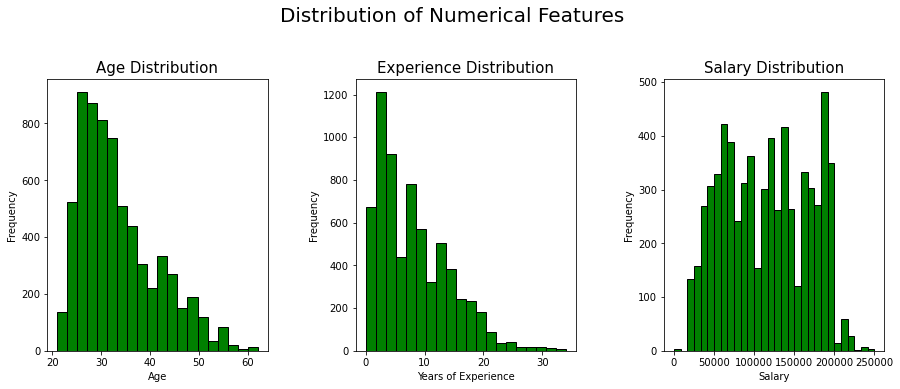

In [5]:
#Visualize distribution of numberical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['Age'], bins=20, edgecolor='black', color='green')
axes[0].set_title('Age Distribution', fontsize=15)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Years of Experience'], bins=20, edgecolor='black', color='green')
axes[1].set_title('Experience Distribution', fontsize=15)
axes[1].set_xlabel('Years of Experience')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['Salary'], bins=30, edgecolor='black', color='green')
axes[2].set_title('Salary Distribution', fontsize=15)
axes[2].set_xlabel('Salary')
axes[2].set_ylabel('Frequency')

fig.suptitle('Distribution of Numerical Features', fontsize=20, y=1.08)

plt.subplots_adjust(wspace=0.4)

plt.show()

In [6]:
#Impute numerical features based on histogram
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

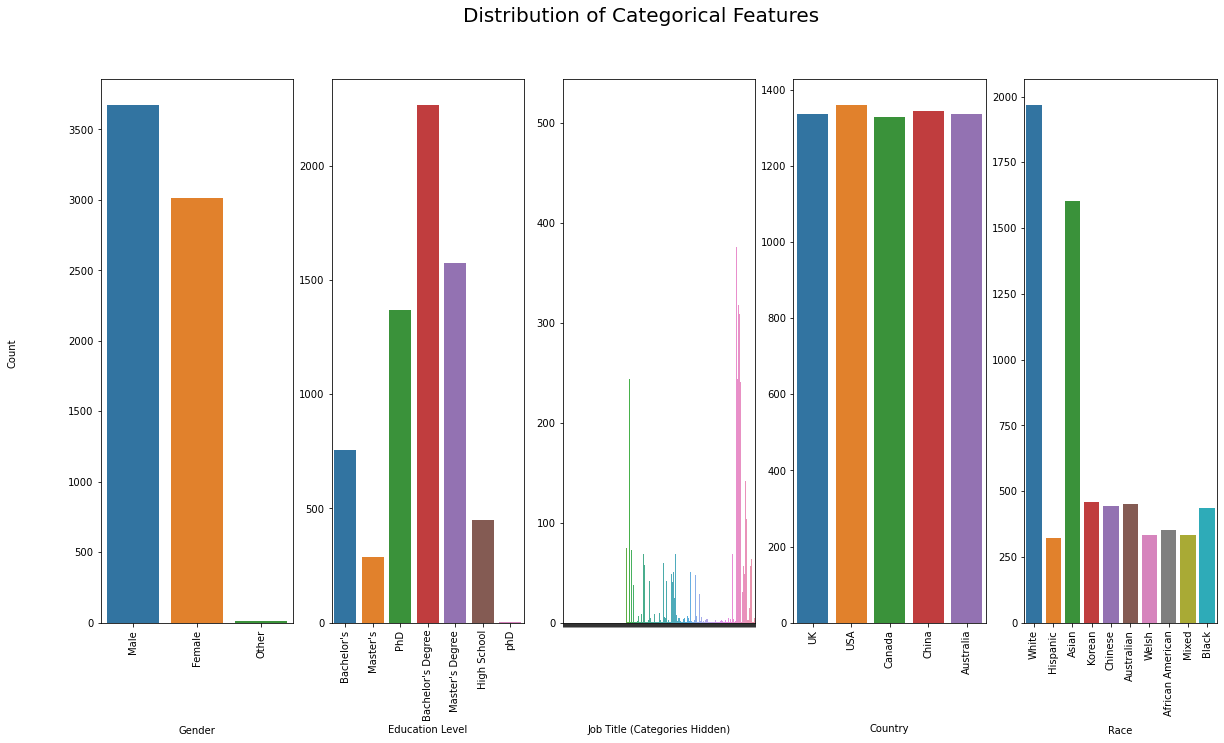

In [7]:
#Visualize distribution of categorical features
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Gender', labelpad=60)

sns.countplot(x='Education Level', data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.countplot(x='Job Title', data=df, ax=axes[2])
axes[2].set_xticklabels([])
axes[2].set_xlabel('Job Title (Categories Hidden)', labelpad=95)

sns.countplot(x='Country', data=df, ax=axes[3])
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_xlabel('Country', labelpad=50)

sns.countplot(x='Race', data=df, ax=axes[4])
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)
axes[4].set_xlabel('Race', labelpad=10)

for ax in axes:
    ax.set_ylabel('')

fig.text(0.06, 0.5, 'Count', va='center', rotation='vertical', fontsize=10)

plt.suptitle('Distribution of Categorical Features', fontsize=20)

plt.show()

In [8]:
#Check count of outlier categories
gender = df['Gender'].value_counts()
education = df['Education Level'].value_counts()
job_title = df['Job Title'].value_counts()

print(gender,'\n\n\n',education,'\n\n\n',job_title, sep='')


Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64


Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64


Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: Job Title, Length: 193, dtype: int64


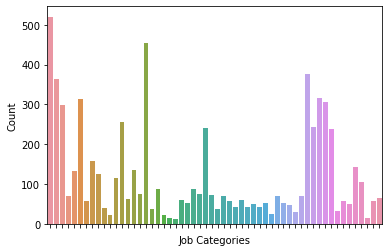

In [20]:
#Replace outlier categories
job_title_replace = df['Job Title'].value_counts()[df['Job Title'].value_counts() <= 10].index
df['Job Title'] = df['Job Title'].replace(job_title_replace, 'Other')
sns.countplot(x='Job Title', data=df)
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.gca().set_xticklabels([])
plt.show()


In [10]:
#Remove outlier categories
df = df[df['Gender'] != 'Other']
df = df[df['Education Level'] != 'phD']

In [11]:
#Categorical features imputation
imputer = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer.fit_transform(df[['Gender']])
df['Education Level'] = imputer.fit_transform(df[['Education Level']])
df['Job Title'] = imputer.fit_transform(df[['Job Title']])

In [12]:
#Install binary encoding
#!pip install category_encoders
import category_encoders as ce

In [13]:
#Categorical encoding
columns_binary_encoding = ['Job Title']
columns_onehot_encoding = ['Gender','Education Level','Country','Race']

binary_encoder = ce.BinaryEncoder(cols=columns_binary_encoding)
df_encoded = binary_encoder.fit_transform(df)
df_encoded = pd.get_dummies(df_encoded, columns = columns_onehot_encoding, prefix = columns_onehot_encoding)

Modeling

In [14]:
#Split data, remove target
x = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [15]:
#Linear Regression Model
model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:',mse)
print('r-squared:',r2)

Mean squared error: 619129609.5730429
r-squared: 0.7766877146894684


In [16]:
#Polynomial regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model1.fit(x_train_poly, y_train)

y_pred = model1.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:',mse)
print('r-squared:',r2)

Mean squared error: 214964756.857224
r-squared: 0.9224649081989252


In [17]:
#Random forest regression

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(x_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(x_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest R-squared (R2): {rf_r2}")

Random Forest Mean Squared Error (MSE): 81555339.74831644
Random Forest R-squared (R2): 0.97058401178546


## Summary
Current modeling shows that random forest regression produces the best fit to determine salary with the given features. However, mean squared error is still high with the model. Further data cleaning and model optimization should be explored. 